In [1]:
#install following modules
#pip install numpy
#pip install pandas
#pip install python-whois
#pip install beautifulsoup4
#pip install urllib

In [2]:
#importing packages numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
# importing packages for Feature Extraction
from urllib.parse import urlparse,urlencode
import re
import ipaddress

In [4]:
#importing packages for Domain Based features
import urllib
import urllib.request
import whois
from datetime import datetime
from bs4 import BeautifulSoup

In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
#importing packages for HTML/Javabased features
import requests

In [7]:
url_data=pd.read_csv('Phising_Url_Data.csv')
url_data.head(10)

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7370666,http://www.bcpzonasegurabeta.viabcpt.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-02T01:55:40+00:00,yes,2021-12-02T02:11:23+00:00,yes,Other
1,7370649,https://segvrsenlineaoperacionlnterbans.xyz/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-02T01:27:14+00:00,yes,2021-12-02T01:33:40+00:00,yes,Other
2,7370616,https://www.bancawlnterbank.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-02T00:07:36+00:00,yes,2021-12-02T00:12:00+00:00,yes,Other
3,7370614,https://www.bancaslnterbank-alerta.com,http://www.phishtank.com/phish_detail.php?phis...,2021-12-02T00:02:02+00:00,yes,2021-12-02T00:12:00+00:00,yes,Other
4,7370570,http://www.empresas-interamk.designpositif.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T22:56:31+00:00,yes,2021-12-01T23:04:42+00:00,yes,Other
5,7370528,https://empresas.xn--intrlbnlk-51a8f.com/login/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T22:07:18+00:00,yes,2021-12-01T22:13:16+00:00,yes,Other
6,7370512,http://vulkanslot-bet777.goval.com.mx/dbs/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T21:53:32+00:00,yes,2021-12-01T22:13:16+00:00,yes,"eBay, Inc."
7,7370502,https://www.empresa.lnterbank.enzonadigital.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T21:30:20+00:00,yes,2021-12-01T21:32:22+00:00,yes,Other
8,7370486,http://bit.do/fSK2k,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T20:49:25+00:00,yes,2021-12-01T22:43:51+00:00,yes,Internal Revenue Service
9,7370485,https://inx.inbox.lv/redirect/qOzS,http://www.phishtank.com/phish_detail.php?phis...,2021-12-01T20:49:05+00:00,yes,2021-12-01T21:05:01+00:00,yes,Internal Revenue Service


In [8]:
#8000 random samples of phishing urls
phishing_url=(url_data.sample(400,replace=False)).reset_index(drop=True)
phishing_url.head(10)

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7053249,http://fb.expressturkeyi.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-04-01T02:05:07+00:00,yes,2021-04-01T02:09:48+00:00,yes,Other
1,7336728,https://chutomen.com/login.php,http://www.phishtank.com/phish_detail.php?phis...,2021-11-02T10:52:08+00:00,yes,2021-11-02T10:58:54+00:00,yes,Other
2,7361680,https://pmbonline.unmuha.ac.id/dnd/authorize_c...,http://www.phishtank.com/phish_detail.php?phis...,2021-11-24T03:01:27+00:00,yes,2021-11-24T03:06:11+00:00,yes,Other
3,7304835,https://linktr.ee/BTBROADBNDS,http://www.phishtank.com/phish_detail.php?phis...,2021-09-28T08:09:41+00:00,yes,2021-09-28T08:19:32+00:00,yes,Other
4,3506274,http://dongsuh.net/visa/index.html/?/visa.com....,http://www.phishtank.com/phish_detail.php?phis...,2015-10-02T14:40:51+00:00,yes,2015-12-20T17:07:47+00:00,yes,Visa
5,6852616,https://docsharex-authorize.firebaseapp.com/xx,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T14:13:02+00:00,yes,2020-11-17T14:24:27+00:00,yes,Other
6,7112718,https://lnkd.in/dYcnFuZ,http://www.phishtank.com/phish_detail.php?phis...,2021-05-14T19:16:34+00:00,yes,2021-05-15T02:43:23+00:00,yes,Internal Revenue Service
7,6791522,http://unitus.mk.ua/sites/default/files/ctools...,http://www.phishtank.com/phish_detail.php?phis...,2020-10-02T14:32:08+00:00,yes,2020-10-02T15:50:39+00:00,yes,Other
8,7366999,https://iwncfywp.cf/,http://www.phishtank.com/phish_detail.php?phis...,2021-11-29T05:45:56+00:00,yes,2021-11-29T09:23:56+00:00,yes,Other
9,7244954,https://fbforpages1414141.web.app/,http://www.phishtank.com/phish_detail.php?phis...,2021-07-27T00:05:32+00:00,yes,2021-07-27T00:15:07+00:00,yes,Facebook


In [9]:
#Reading samples of Non-Phishing URLs
non_phishing_url_data=pd.read_csv('Legitimate_URL.csv')
non_phishing_url_data.columns = ['URL']
non_phishing_url_data.head(10)

,URL
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...
5,http://1337x.to/torrent/294349/American-Idol-S...
6,http://189.cn/dqmh/userCenter/myOrderInfoList....
7,http://2gis.ru/moscow/search/%D0%9F%D0%BE%D0%B...
8,http://abc.go.com/shows/general-hospital/episo...
9,http://abc.go.com/shows/the-muppets/video/new-...


In [10]:
#8000 random samples of non-phishing urls
non_phishing_url=(non_phishing_url_data.sample(400,replace=False)).reset_index(drop=True)
non_phishing_url.head(10)

,URL
0,http://ap.org/Content/Press-Release/2013/AP-re...
1,http://oneplus.net/ca_en/support/answer/changi...
2,http://putlocker.is/watch-geordie-shore-tvshow...
3,http://censor.net.ua/tag/4535/%D0%B2%D0%BE%D0%...
4,https://twitter.com/home?status=%E3%83%8C%E3%8...
5,http://espn.go.com/blog/acc/post/_/id/81925/is...
6,http://kenh14.vn/cine/tom-hiddleston-cam-ta-da...
7,http://momoshop.com.tw/category/LgrpCategory.j...
8,https://hollywoodlife.com/2015/05/13/tyanna-jo...
9,http://torcache.net/torrent/5FF1A08E4803E66F32...


In [11]:
#Feature Extraction Part

In [12]:
#Address Bar Features

In [13]:
#ipaddress feature
def check_ip(url_name):
  try:
    ipaddress.ip_address(url_name)
    ip_value = 1
  except:
    ip_value = 0
  return ip_value

In [14]:
#url domain feature
def extract_domain_name(url_name):
    url_domain=urlparse(url_name).netloc
    if re.match(r"^www.",url_domain):
        url_domain=url_domain.replace("www.","")
    return url_domain

In [15]:
#"@" symbol feature
def check_at_sign(url_name):
    if "@" in url_name:
        return 1
    else:
        return 0

In [16]:
#Redirection feature
def check_redirection(url_name):
    find_position = url_name.rfind('//')
    if find_position<6:
        return 0
    else:
        if find_position>7:
            return 1
        else:
            return 0

In [17]:
#URL Depth Feature
#We can get depth by splitting URL using '/'
def check_depth(url_name):
    url_split=urlparse(url_name).path.split('/')
    d=0
    for y in url_split:
        if y!="":
            d+=1
    return d

In [18]:
#Checking http/https in domain name
#URL having http or https in domain part are phishing sites
def check_http(url_name):
    url_domain=urlparse(url_name).netloc
    if 'https' in url_domain:
        return 1
    elif 'http' in url_domain:
        return 1
    else:
        return 0

In [19]:
#Checking '-' in domain name
#URL having '-' in domain part are generally phishing websites
def check_hyphen(url_name):
    if '-' in urlparse(url_name).netloc:
        return 1
    else:
        return 0

In [20]:
#Checking length of url
#URL having length >= 54 are generally phishing sites
def check_length(url_name):
    if len(url_name)<54:
        return 0
    else:
        return 1

In [21]:
#Checking URL shortening services
#URL using shortening services are generally phishing sites
short_list = r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|"\
             r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
             r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
             r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
             r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
             r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
             r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
             r"tr\.im|link\.zip\.net"

def check_shorturl(url_name):
    found=re.search(short_list,url_name)
    if found:
        return 1
    else:
        return 0

In [22]:
#Domain Based Features

In [23]:
#Checking Web Traffic of Website
#Phishing sites usually have short lifespan, so they are not generally recognized by Alexa Database.
#Alexa Database provides the rank for the websites
#Non-phishing or legitimate sites are usually ranked under top 100,000
#If domain has rank<100,000 we categorize them as phishing sites
def check_webtraffic(url_name):
  try:
    url = urllib.parse.quote(url_name)
    try:
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url_name).read(), "xml").find(
            "REACH")['RANK']
    except:
        return 0
    rank = int(rank)
  except TypeError:
        return 1
  if rank >=100000:
    return 0
  else:
    return 1

In [24]:
#Checking Age of URL
#Phishing sites have lipspan generally less than 12 months
#For phishing sites, age of url<12
#This feature will be extracted using WHOIS database
def check_domainage(url_name):
      start_date = url_name.creation_date
      end_date = url_name.expiration_date
      if (isinstance(start_date,str) or isinstance(end_date,str)):
        try:
          start_date = datetime.strptime(start_date,'%Y-%m-%d')
          end_date = datetime.strptime(end_date,"%Y-%m-%d")
        except:
          return 1
      if ((end_date is None) or (start_date is None)):
          return 1
      elif ((type(end_date) is list) or (type(start_date) is list)):
          return 1
      else:
        domain_age = abs((end_date-start_date).days)
        if ((domain_age/30) < 6):
          return 1
        else:
          return 0

In [25]:
#Checking End Period of URL
#If end period>6 months, classified as phishing website
#This feature will be extracted using WHOIS database
def check_domainend(domain_name):
      end_date = domain_name.expiration_date
      if isinstance(end_date,str):
        try:
          end_date = datetime.strptime(end_date,"%Y-%m-%d")
        except:
          return 1
      if (end_date is None):
          return 1
      elif (type(end_date) is list):
          return 1
      else:
        today = datetime.now()
        end = abs((end_date - today).days)
        if ((end/30) < 6):
          return 0
        else:
          return 1
        

In [26]:
#HTML/JAVASCRIPT FEATURES

In [27]:
#Checking if right click is disabled or not
#Phishing Sites usually disables the right-click function, so that users may not view webpage source code
def checkright_click(content):
    if content == "":
        return 1
    else:
        if re.findall(r"event.button ?== ?2", content.text):
            return 0
        else:
            return 1

In [28]:
#Checking Iframes Redirection
#Phising sites uses iframe html tag to render visual delineation
def check_iframe(content):
    if content=="":
        return 1
    else:
        if re.findall(r"[<iframe>|<frameBorder>]",content.text):
            return 0
        else:
            return 1

In [29]:
#Checking Count of Redirection
#Legal sites can have max 2 redirections while phishing sites may have at least 4 redirections
def check_redirection_js(content):
    if content=="":
        return 1
    else:
        count=len(content.history)
        if count>2:
            return 1
        else:
            return 0

In [30]:
#Checking fake url in status bar
#phishing sites may use javascript to show fake url in status bar
def check_mouseover(content):
    if content=="":
        return 1
    else:
        if re.findall("<script>.+onmouseover.+</script>",content.text):
            return 1
        else:
            return 0

In [31]:
#Function to append all above features into a list
def features(url_name,label):
    url_features=[]
    
    #Appending address based features
    url_features.append(extract_domain_name(url_name))
    url_features.append(check_ip(url_name))
    url_features.append(check_at_sign(url_name))
    url_features.append(check_redirection(url_name))
    url_features.append(check_depth(url_name))
    url_features.append(check_http(url_name))
    url_features.append(check_hyphen(url_name))
    url_features.append(check_length(url_name))
    url_features.append(check_shorturl(url_name))
    
    #Appending domain based features
    #dbf=0
    #try:
        #domain_name=urlparse(url_name).netloc
        #domain=whois.whois(domain_name)
    #except:
        #dbf=1
    
    #url_features.append(dbf)
    #url_features.append(check_webtraffic(url_name))
    
    #if dbf==1:
        #url_features.append(dbf)
    #else:
        #url_features.append(check_domainage(domain))
    
    #if dbf==1:
        #url_features.append(dbf)
    #else:
        #url_features.append(check_domainend(domain))
        
    #Appending HTML/Javabased features
    try:
        content=requests.get(url_name,timeout=30)
    except:
        content=""
    url_features.append(checkright_click(content))
    url_features.append(check_iframe(content))
    url_features.append(check_redirection_js(content))
    url_features.append(check_mouseover(content))
    url_features.append(label)
    
    return url_features

In [32]:
#Feature Extraction for Phising Websites

In [33]:
phishing=[]
lbl=1
for x in range(0,400):
    url_name=phishing_url['url'][x]
    phishing.append(features(url_name,lbl))
    print("Extracting Features Completed for Phishing URL "+str(x))

Extracting Features Completed for Phishing URL 0
Extracting Features Completed for Phishing URL 1
Extracting Features Completed for Phishing URL 2
Extracting Features Completed for Phishing URL 3
Extracting Features Completed for Phishing URL 4
Extracting Features Completed for Phishing URL 5
Extracting Features Completed for Phishing URL 6
Extracting Features Completed for Phishing URL 7
Extracting Features Completed for Phishing URL 8
Extracting Features Completed for Phishing URL 9
Extracting Features Completed for Phishing URL 10
Extracting Features Completed for Phishing URL 11
Extracting Features Completed for Phishing URL 12
Extracting Features Completed for Phishing URL 13
Extracting Features Completed for Phishing URL 14
Extracting Features Completed for Phishing URL 15
Extracting Features Completed for Phishing URL 16
Extracting Features Completed for Phishing URL 17
Extracting Features Completed for Phishing URL 18
Extracting Features Completed for Phishing URL 19
Extracting

In [34]:
dataframe_columns=['Domain Name','IP','@ Sign','Redirection','Depth','HTTP','Hyphen','Length','ShortURL','RightClick','Iframe','Redirection JS','Mouseover','Label']

In [35]:
phishing_df = pd.DataFrame(phishing,columns=dataframe_columns)
phishing_df.head()

,Domain Name,IP,@ Sign,Redirection,Depth,HTTP,Hyphen,Length,ShortURL,RightClick,Iframe,Redirection JS,Mouseover,Label
0,fb.expressturkeyi.com,0,0,0,0,0,0,0,0,1,0,0,0,1
1,chutomen.com,0,0,0,1,0,0,0,0,1,1,1,1,1
2,pmbonline.unmuha.ac.id,0,0,0,2,0,0,1,0,1,1,1,1,1
3,linktr.ee,0,0,0,1,0,0,0,0,1,0,0,0,1
4,dongsuh.net,0,0,0,2,0,0,1,0,1,0,0,0,1


In [36]:
non_phishing = []
lbl = 0
for x in range(0, 400):
  url_name = non_phishing_url['URL'][x]
  print(url_name)
  non_phishing.append(features(url_name,lbl))
  print("Extracting Features Completed for Non-Phishing URL "+str(x))

http://ap.org/Content/Press-Release/2013/AP-reporter-awarded-fellowship-on-economics-of-aging-and-work
Extracting Features Completed for Non-Phishing URL 0
http://oneplus.net/ca_en/support/answer/changing-shipment-method-after-placing-order
Extracting Features Completed for Non-Phishing URL 1
http://putlocker.is/watch-geordie-shore-tvshow-season-2-episode-5-online-free-putlocker.html
Extracting Features Completed for Non-Phishing URL 2
http://censor.net.ua/tag/4535/%D0%B2%D0%BE%D0%BB%D0%BE%D0%BD%D1%82%D0%B5%D1%80%D1%8B
Extracting Features Completed for Non-Phishing URL 3
https://twitter.com/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC%81%E3%80%90%E7%B4%A0%E4%BA%BA%E3%80%91+http%3A%2F%2Fero-video.net%2Ft%2F9HXup750YjaPI94v+%E6%8F%B4%E4%BA%A4%E3%80%80%E3%81%82%E3%82%8A%E3%81%95%EF%BC%8820%E6%AD%B3%EF%BC%89+%23ero+%23douga+%23agesage
Extracting Features Completed for Non-Phishing URL 4
http://espn.go.com/blog/acc/post/_/id/81925/is-deshaun-watson-the-most-intriguing-player-in-college-foo

In [37]:
non_phishing_df = pd.DataFrame(non_phishing,columns=dataframe_columns)
non_phishing_df.head()

,Domain Name,IP,@ Sign,Redirection,Depth,HTTP,Hyphen,Length,ShortURL,RightClick,Iframe,Redirection JS,Mouseover,Label
0,ap.org,0,0,0,4,0,0,1,0,1,0,1,0,0
1,oneplus.net,0,0,0,4,0,0,1,0,1,0,0,0,0
2,putlocker.is,0,0,0,1,0,0,1,0,1,0,0,0,0
3,censor.net.ua,0,0,0,3,0,0,1,0,1,0,0,0,0
4,twitter.com,0,0,0,1,0,0,1,0,1,0,0,0,0


In [38]:
phishing_df.to_csv('Phising URL Data',index=False)

In [39]:
#Concatenating the dataframes into one 
urldata = pd.concat([phishing_df,non_phishing_df]).reset_index(drop=True)

In [40]:
urldata = urldata.sample(frac=1).reset_index(drop=True)
urldata.head(100)

,Domain Name,IP,@ Sign,Redirection,Depth,HTTP,Hyphen,Length,ShortURL,RightClick,Iframe,Redirection JS,Mouseover,Label
0,xossip.com,0,0,0,1,0,0,1,0,1,0,0,0,0
1,censor.net.ua,0,0,0,3,0,0,1,0,1,0,0,0,0
2,fishki.net,0,0,0,1,0,0,1,0,1,0,0,0,0
3,iplogger.org,0,0,0,1,0,0,0,0,1,0,0,0,1
4,shopee688.com,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,katproxy.com,0,0,0,1,0,0,1,0,1,0,0,0,0
96,production.keep-paper-account.sales18130.worke...,0,0,0,0,0,1,1,0,1,1,1,1,1
97,top10songsnews.com,0,0,0,3,0,0,1,0,1,0,0,0,1
98,dantri.com.vn,0,0,0,2,0,0,1,0,1,0,0,0,0


In [41]:
urldata.to_csv('URLDATA.csv',index=False)

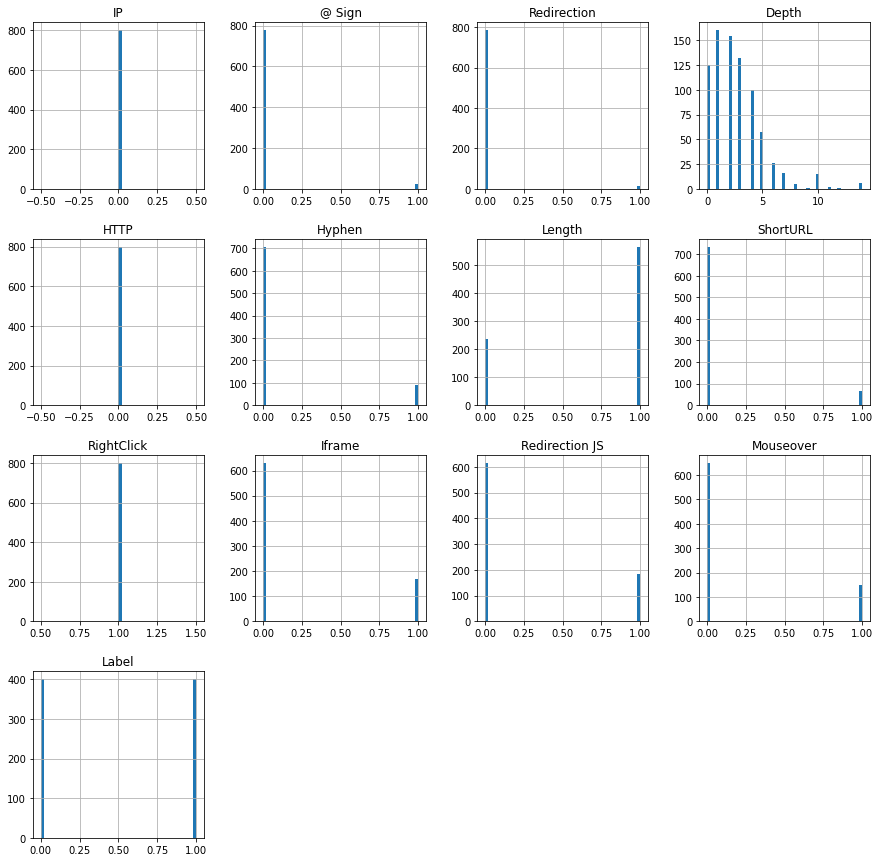

In [42]:
#Visualizing the data
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

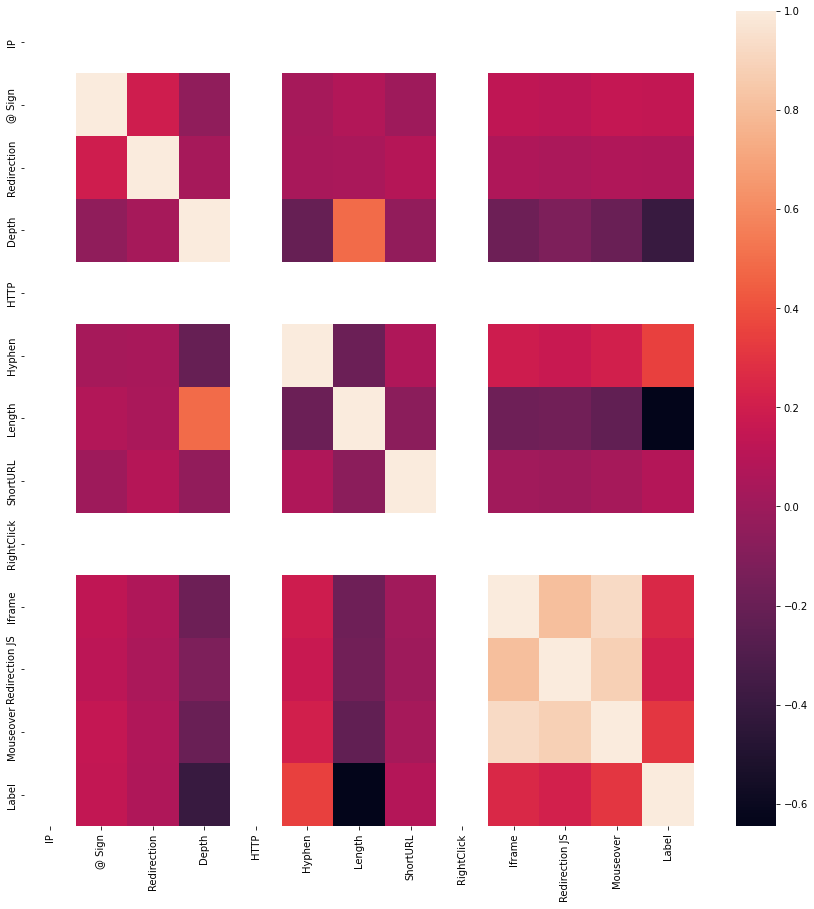

In [44]:
#Plotting Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(urldata.corr())
plt.show()

In [45]:
#Machine Learning Models

In [46]:
urldata

,Domain Name,IP,@ Sign,Redirection,Depth,HTTP,Hyphen,Length,ShortURL,RightClick,Iframe,Redirection JS,Mouseover,Label
0,xossip.com,0,0,0,1,0,0,1,0,1,0,0,0,0
1,censor.net.ua,0,0,0,3,0,0,1,0,1,0,0,0,0
2,fishki.net,0,0,0,1,0,0,1,0,1,0,0,0,0
3,iplogger.org,0,0,0,1,0,0,0,0,1,0,0,0,1
4,shopee688.com,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,production.dry-snow-ddc20ffice.deuceice2.worke...,0,0,0,0,0,1,1,0,1,0,0,0,1
796,earth01.info,0,0,0,3,0,0,1,0,1,0,0,0,1
797,nour-ala-nour.com,0,0,0,1,0,1,0,0,1,0,0,0,1
798,aljazeera.net,0,0,0,6,0,0,1,0,1,0,0,0,0


In [47]:
phishing_sample=(phishing_df.sample(200,replace=False)).reset_index(drop=True)
non_phishing_sample=(non_phishing_df.sample(200,replace=False)).reset_index(drop=True)
testdata=pd.concat([phishing_sample,non_phishing_sample]).reset_index(drop=True)

In [48]:
#Dropping Domain Column
#The Domain Column can be dropped as it does not have any significance to model training.
testdata=testdata.drop(['Domain Name'],axis=1).copy()

In [74]:
#Test-Trainig Split for Model
#Seperating x and y values
y=testdata['Label']
x=testdata.drop('Label',axis=1)

In [80]:
#Splitting dataset into 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

K-Means Classifier

In [81]:
#Applying K-Means Classifier
from sklearn.cluster import KMeans
import sklearn.metrics as sm
k_means = KMeans(2)
k_means.fit(x_train,y_train)
score = sm.accuracy_score(y_train,k_means.predict(x_train))
print('Training Accuracy of K-Means:{0:f}'.format(score))
score = sm.accuracy_score(y_test,k_means.predict(x_test))
print('Testing Accuracy of K-Means:{0:f}'.format(score))
confusion_matrix(y_test,k_means.predict(x_test))

Training Accuracy of K-Means:0.634375
Testing Accuracy of K-Means:0.675000


array([[18, 21],
       [ 5, 36]], dtype=int64)

Naive Bayes Classifier Algorithm

In [53]:
#Applying Naive Bayes Classifier Algorithm
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_test,y_test)

0.7

In [54]:
print("Training Accuracy for Naive Bayes: ",mnb.score(x_train,y_train))
print("Testing Accuracy for Naive Bayes: ",mnb.score(x_test,y_test))

Training Accuracy for Naive Bayes:  0.740625
Testing Accuracy for Naive Bayes:  0.7


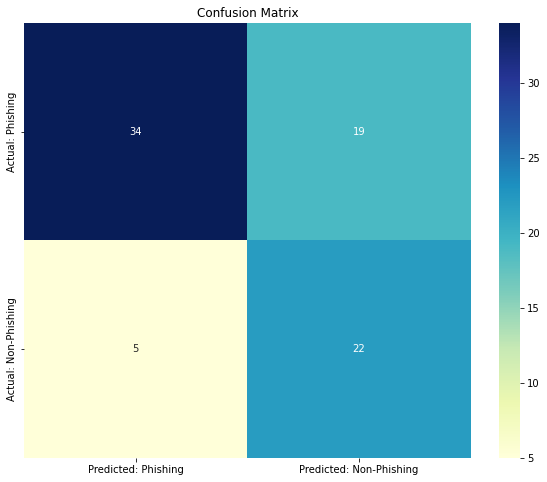

In [55]:
#Plotting Confusion Matrix for Naive Bayes
cns_matrix = pd.DataFrame(confusion_matrix(mnb.predict(x_test), y_test),columns = ['Predicted: Phishing', 'Predicted: Non-Phishing'],
            index = ['Actual: Phishing', 'Actual: Non-Phishing'])
plt.figure(figsize= (10,8))
sns.heatmap(cns_matrix, annot = True,fmt='d',cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

Logistic Regression

In [56]:
#Creating Logistic Regression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
logistic.score(x_test,y_test)

0.85

In [58]:
print("Training Accuracy for Logistic Regression: ",logistic.score(x_train,y_train))
print("Testing Accuracy for Logistic Regression: ",logistic.score(x_test,y_test))

Training Accuracy for Logistic Regression:  0.86875
Testing Accuracy for Logistic Regression:  0.85


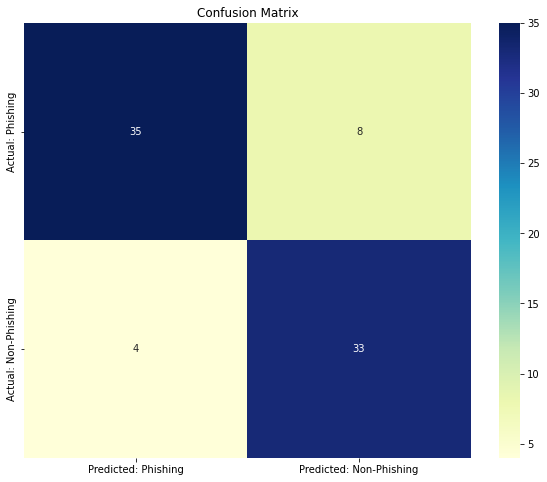

In [59]:
#Plotting Confusion Matrix for Logistic Regression
cns_matrix = pd.DataFrame(confusion_matrix(logistic.predict(x_test), y_test),columns = ['Predicted: Phishing', 'Predicted: Non-Phishing'],
            index = ['Actual: Phishing', 'Actual: Non-Phishing'])
plt.figure(figsize= (10,8))
sns.heatmap(cns_matrix, annot = True,fmt='d',cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

Decision Tree Model

In [60]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
decision_tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
#predicting the target value from the model for the samples
y_test_decision_tree = decision_tree.predict(x_test)
y_train_decision_tree = decision_tree.predict(x_train)

In [62]:
#computing the accuracy of the model performance
acc_train_decision_tree = accuracy_score(y_train,y_train_decision_tree)
acc_test_decision_tree = accuracy_score(y_test,y_test_decision_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_decision_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_decision_tree))

Decision Tree: Accuracy on training Data: 0.887
Decision Tree: Accuracy on test Data: 0.863


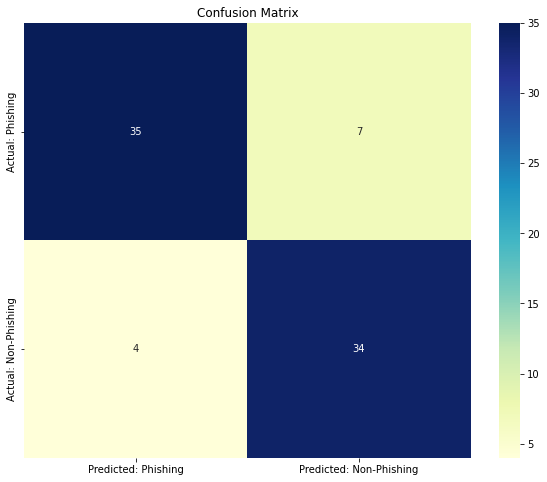

In [63]:
#Plotting Confusion Matrix for Decision Tree
cns_matrix = pd.DataFrame(confusion_matrix(decision_tree.predict(x_test), y_test),columns = ['Predicted: Phishing', 'Predicted: Non-Phishing'],
            index = ['Actual: Phishing', 'Actual: Non-Phishing'])
plt.figure(figsize= (10,8))
sns.heatmap(cns_matrix, annot = True,fmt='d',cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier

In [64]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [65]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

In [66]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.881
Random forest: Accuracy on test Data: 0.863


In [82]:
Ml_scores={}
Ml_scores['K-Means']=0.675
Ml_scores['Naive Bayes']=np.round(mnb.score(x_test,y_test),2)
Ml_scores['Logistic Regression']=np.round(logistic.score(x_test,y_test),2)
Ml_scores['Decision Tree']=np.round(decision_tree.score(x_test,y_test),2)
Ml_scores['Random Forest']=np.round(forest.score(x_test,y_test),2)

C:\Users\18604\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


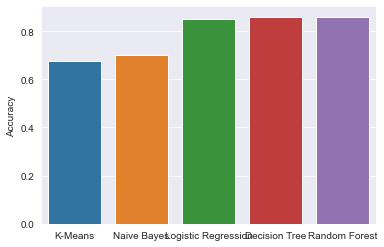

In [83]:
acc = pd.DataFrame.from_dict(Ml_scores,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)
plt.show()

In [86]:
#Test-Trainig Split for 6000 URLs
#Seperating x and y values
y_urldata=urldata['Label']
x_urldata=urldata.drop(['Label','Domain Name'],axis=1)

In [87]:
#Splitting dataset into 80-20 split
x_train_urldata, x_test_urldata, y_train_urldata, y_test_urldata = train_test_split(x_urldata,y_urldata,test_size=0.2,random_state=70)

In [88]:
# instantiate the model 
decision_tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
decision_tree.fit(x_train_urldata, y_train_urldata)

DecisionTreeClassifier(max_depth=5)

In [89]:
#predicting the target value from the model for the samples
y_test_decision_tree = decision_tree.predict(x_test_urldata)
y_train_decision_tree = decision_tree.predict(x_train_urldata)

In [90]:
#computing the accuracy of the model performance
acc_train_decision_tree = accuracy_score(y_train_urldata,y_train_decision_tree)
acc_test_decision_tree = accuracy_score(y_test_urldata,y_test_decision_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_decision_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_decision_tree))

Decision Tree: Accuracy on training Data: 0.866
Decision Tree: Accuracy on test Data: 0.869


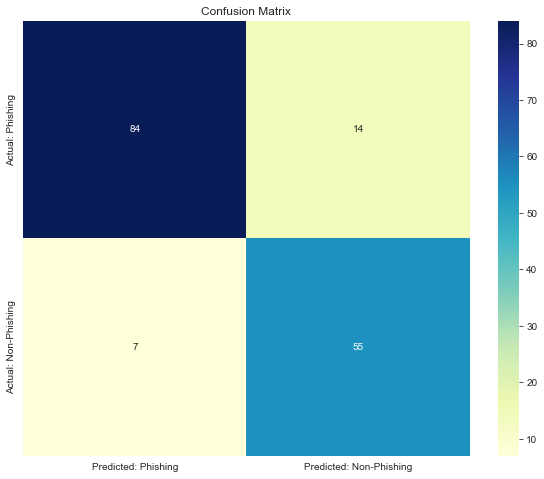

In [91]:
#Plotting Confusion Matrix for Final Decision Tree
cns_matrix = pd.DataFrame(confusion_matrix(decision_tree.predict(x_test_urldata), y_test_urldata),columns = ['Predicted: Phishing', 'Predicted: Non-Phishing'],
            index = ['Actual: Phishing', 'Actual: Non-Phishing'])
plt.figure(figsize= (10,8))
sns.heatmap(cns_matrix, annot = True,fmt='d',cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()